<a href="https://colab.research.google.com/github/IlyaZutler/Project-OpenWeather/blob/main/colab_weather_sh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
!wget https://raw.githubusercontent.com/IlyaZutler/Project-OpenWeather/main/weather_lib.py
import weather_lib as wlib
import datetime

--2024-06-09 23:27:28--  https://raw.githubusercontent.com/IlyaZutler/Project-OpenWeather/main/weather_lib.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3282 (3.2K) [text/plain]
Saving to: ‘weather_lib.py.12’

weather_lib.py.12   100%[===================>]   3.21K  --.-KB/s    in 0s      

2024-06-09 23:27:29 (42.0 MB/s) - ‘weather_lib.py.12’ saved [3282/3282]



A weather forecaster is like a sapper  -
he makes mistakes only once
(but every day) 

Enter the city: Jerusalem

Time in the Jerusalem: 02:27  10.06.2024
Sunrise:             05:33
Sunset:              19:44
Temperature Now:     from 18.8  to 19.9 °C
Weather:             clear sky
Humidity:            72 %


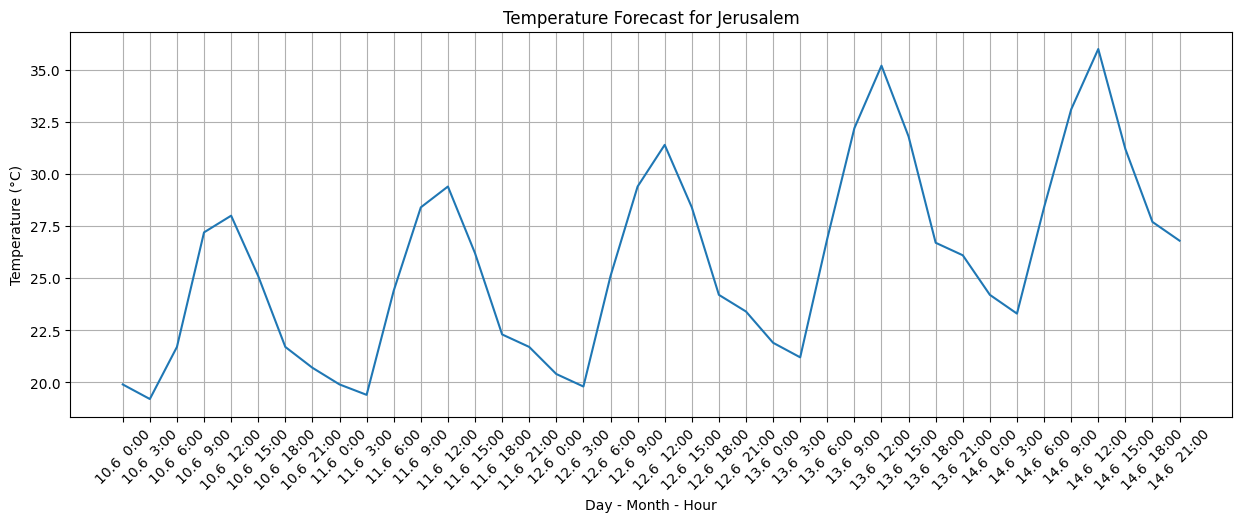

                     temp_min °C  temp_max °C  humidity %    weather
day_time                                                            
10.06.2024    00:00         18.8         19.9          72  clear sky
10.06.2024    03:00         17.8         19.2          74  clear sky
10.06.2024    06:00         21.7         22.6          56  clear sky
10.06.2024    09:00         27.2         27.2          39  clear sky
10.06.2024    12:00         28.0         28.0          36  clear sky
10.06.2024    15:00         25.1         25.1          47  clear sky
10.06.2024    18:00         21.7         21.7          62  clear sky
10.06.2024    21:00         20.7         20.7          64  clear sky
11.06.2024    00:00         19.9         19.9          63  clear sky
11.06.2024    03:00         19.4         19.4          63  clear sky
11.06.2024    06:00         24.4         24.4          41  clear sky
11.06.2024    09:00         28.4         28.4          30  clear sky
11.06.2024    12:00         29.4  

In [29]:
hi = '''A weather forecaster is like a sapper  -
he makes mistakes only once
(but every day) \n'''

url = "https://raw.githubusercontent.com/IlyaZutler/Project-OpenWeather/main/param_defolt.json"

defolt_parametrs = wlib.get_defolt_parametrs(url)
city = defolt_parametrs['params']['city']
units = defolt_parametrs['params']['units']
key = defolt_parametrs['params']['key']

request = True
while request:

    print(hi)
    city = input('Enter the city: ')
    print()

    data = wlib.get_weather(city, units, key)
    if not data:
        print('Something is going wrong......')
    else:
        dt_txt_datetime, temp, temp_min, temp_max, humidity, description = wlib.data_to_lists(data)
        sunrise, sunset = wlib.get_sun_time(data)
        local_time = wlib.time_in_the_city(data)

        print(f'Time in the {city}:'.ljust(20),  f'{local_time.strftime("%H:%M  %d.%m.%Y")}')
        print('Sunrise:'.ljust(20),  f'{sunrise.strftime("%H:%M")}')
        print('Sunset:'.ljust(20),  f'{sunset.strftime("%H:%M")}')
        print(f'Temperature Now:'.ljust(20),  f'from {temp_min[0]:.1f}  to {temp_max[0]:.1f} °C')
        print('Weather:'.ljust(20),  f'{description[0]}')
        print('Humidity:'.ljust(20),  f'{humidity[0]} %')

        wlib.plot_weather(dt_txt_datetime, temp, city)
        print(wlib.table_of_data(dt_txt_datetime, temp_min, temp_max, humidity, description))

    # weather chart covers the input field
    # want_add = input("Enter 1 to Continue or 0 to Exit: ")
    # request = (want_add == '1')
    request = False

